<a href="https://colab.research.google.com/github/jmcava/jmcava/blob/main/zona_414_verean%C3%A7a_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Caminho do arquivo CSV
file_path = '/content/votacao_candidato_414.csv'

# Carregar o arquivo com a codificação adequada e o separador correto
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Exibir as colunas para confirmação
print("Colunas disponíveis no arquivo:")
print(df.columns)

# Filtrar apenas os candidatos eleitos e reeleitos com base na situação de totalização
# Certifique-se de ajustar os valores de acordo com a nomenclatura do seu arquivo
df_eleitos = df[df['Situação totalização'].str.contains('Eleito', case=False, na=False)]

# Selecionar colunas relevantes
df_eleitos = df_eleitos[['Nome candidato', 'Partido','Votos nominais']]

# Ordenar por votos nominais de forma decrescente
df_eleitos_sorted = df_eleitos.sort_values(by='Votos nominais', ascending=False)

# Mostrar os primeiros registros para validação
print(df_eleitos_sorted.head())

# Salvar o resultado em um novo arquivo CSV
df_eleitos_sorted.to_csv('/content/candidatos_eleitos_414.csv', index=False, encoding='utf-8')


Colunas disponíveis no arquivo:
Index(['Ano de eleição', 'Cargo', 'Município', 'Nome candidato', 'Partido',
       'Situação totalização', 'UF', 'Zona', 'Votos nominais',
       'Data de carga'],
      dtype='object')
                Nome candidato    Partido  Votos nominais
243         JOSIAS JOÃO DE PAZ       PODE            2772
202  PERY RODRIGUES DOS SANTOS  CIDADANIA            1907
403  ANTONIO APARECIDO TAVARES       AGIR            1810
415     GERALDO GOMES DA SILVA        PRD            1641
498   GETULIO BATISTA CANGUSSU         PT            1595


In [3]:
print(df_eleitos)

                      Nome candidato Partido  Votos nominais
0           CLAUDIO MORAES PARADINHA      DC              23
1                REGINALDO DOMINGUES     PSB              16
6                 LIGIA MARIA GRECCO      PP              70
7              PATRICIA LIMA SANTANA      DC              35
8             RICARDO DA SILVA ALVES     PDT               5
..                               ...     ...             ...
544          FABIO DE SOUZA FERREIRA     PSB              43
549           RODRIGO GARJAKA CORTEZ    NOVO              35
550            EDMAR ARAGÃO DA SILVA  AVANTE              98
552  DANILO FURTADO DE SOUSA QUEIROZ    REDE               6
555            JOSÉ ABELMAR DA SILVA    NOVO              10

[245 rows x 3 columns]


In [4]:
# Verifique os valores únicos na coluna de Situação totalização para identificar o termo correto
print(df['Situação totalização'].unique())

# Ajustar o filtro para incluir apenas candidatos eleitos
df_eleitos_corrigido = df[df['Situação totalização'].isin(['Eleito', 'Eleito por Média', 'Eleito por QP'])]

# Recontar o total de candidatos eleitos
total_eleitos_corrigido = len(df_eleitos_corrigido)
print(f"Total de candidatos eleitos: {total_eleitos_corrigido}")


['Não Eleito' 'Suplente' 'Eleito']
Total de candidatos eleitos: 28


In [5]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias e ordená-las
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado
print(df_final.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final.to_csv('/content/candidatos_eleitos_filtrados.csv', index=False, encoding='utf-8')


                   Nome candidato    Partido  Votos nominais
33         LUIZ HENRIQUE WATANABE       PRTB             652
49             SANDRA DE OLIVEIRA       PODE             115
78            ALAN GOMES FERREIRA  CIDADANIA             446
86       LUANA ELOÁ MARTINS NOBRE        MDB             516
97  FRANCISCO JOSE RODRIGUES NETO       PODE             594


In [6]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Exibir as primeiras linhas do resultado ordenado
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados.csv', index=False, encoding='utf-8')


                Nome candidato    Partido  Votos nominais
243         JOSIAS JOÃO DE PAZ       PODE            2772
202  PERY RODRIGUES DOS SANTOS  CIDADANIA            1907
403  ANTONIO APARECIDO TAVARES       AGIR            1810
415     GERALDO GOMES DA SILVA        PRD            1641
498   GETULIO BATISTA CANGUSSU         PT            1595


In [7]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


                Nome candidato    Partido  Votos nominais  Posição
243         JOSIAS JOÃO DE PAZ       PODE            2772        1
202  PERY RODRIGUES DOS SANTOS  CIDADANIA            1907        2
403  ANTONIO APARECIDO TAVARES       AGIR            1810        3
415     GERALDO GOMES DA SILVA        PRD            1641        4
498   GETULIO BATISTA CANGUSSU         PT            1595        5


In [8]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Reorganizar as colunas para garantir que 'Posição' seja a primeira
df_final_sorted = df_final_sorted[['Posição', 'Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


     Posição             Nome candidato    Partido  Votos nominais
243        1         JOSIAS JOÃO DE PAZ       PODE            2772
202        2  PERY RODRIGUES DOS SANTOS  CIDADANIA            1907
403        3  ANTONIO APARECIDO TAVARES       AGIR            1810
415        4     GERALDO GOMES DA SILVA        PRD            1641
498        5   GETULIO BATISTA CANGUSSU         PT            1595


In [9]:
print(df_final_sorted.index)

Index([243, 202, 403, 415, 498, 236, 540, 303, 329, 384, 248, 530, 521,  33,
       198, 497,  97,  86, 464,  78, 366, 124, 263, 137, 319,  49, 494, 550],
      dtype='int64')


In [10]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))

 Posição                       Nome candidato      Partido  Votos nominais
       1                   JOSIAS JOÃO DE PAZ         PODE            2772
       2            PERY RODRIGUES DOS SANTOS    CIDADANIA            1907
       3            ANTONIO APARECIDO TAVARES         AGIR            1810
       4               GERALDO GOMES DA SILVA          PRD            1641
       5             GETULIO BATISTA CANGUSSU           PT            1595
       6            JOÃO VICTOR VIANA PEREIRA    CIDADANIA            1297
       7                 DANILO LIMA DE RAMOS         PODE            1213
       8                   JULIO CESAR FUZARI    CIDADANIA            1062
       9                 MARINA PEREIRA BRAGA           PL             951
      10         ANA NICE MARTINS DE CARVALHO           PT             937
      11          JOÃO BATISTA RAMOS DA SILVA REPUBLICANOS             901
      12          HENRIQUE SANTOS DE OLIVEIRA          PMB             729
      13                 

Codificação detectada: ISO-8859-1


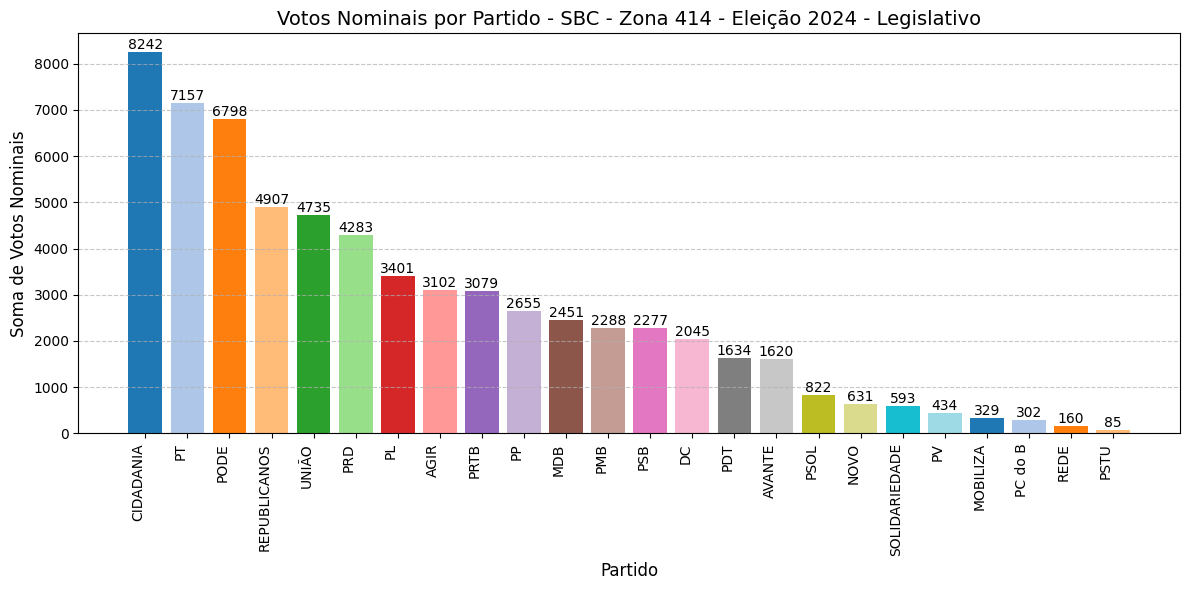

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# Detecta a codificação
with open("/content/votacao_candidato_414.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

print(f"Codificação detectada: {result['encoding']}")

# Carrega o CSV com a codificação e o separador corretos
df_414 = pd.read_csv("/content/votacao_candidato_414.csv", encoding=result['encoding'], sep=";")

# Agrupa por partido e soma os votos nominais
df_agregado_414 = df_414.groupby('Partido')['Votos nominais'].sum().reset_index()

# Ordena os dados para o gráfico (opcional, mas recomendado)
df_agregado_414 = df_agregado_414.sort_values('Votos nominais', ascending=False)



# Cria o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(df_agregado_414['Partido'], df_agregado_414['Votos nominais'], color=plt.colormaps['tab20'].colors)

plt.xlabel('Partido', fontsize=12)
plt.ylabel('Soma de Votos Nominais', fontsize=12)
plt.title('Votos Nominais por Partido - SBC - Zona 414 - Eleição 2024 - Legislativo', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom')


plt.show()